# Demo from README

This notebook contains the different code blocks shown in the [README file](../README.md) of this repository. You can choose to copy the individual code blocks from the README file, or run this notebook instead.  

## 1. Loading data

In [1]:
from dtaianomaly.data_management import DataManager

# Initialize the data manager
data_manager = DataManager(datasets_index_file='../data/datasets.csv')

# Select all datasets
data_manager.select({'collection_name': 'Demo', 'dataset_name': 'Demo1'}) 
# Get the index of the first selected dataset
dataset_index = data_manager.get(0)  
# Load the trend data (as a numpy ndarray) and the anomaly labels
trend_data, labels = data_manager.load_raw_data(dataset_index, train=False)

## 2. Detecting anomalies

In [2]:
from dtaianomaly.anomaly_detection import PyODAnomalyDetector, Windowing

# Initialize the anomaly detector
# Here we use an IForest with a sliding window of size 16
anomaly_detector = PyODAnomalyDetector('IForest', Windowing(window_size=100))

# Fit the anomaly detector 
anomaly_detector.fit(trend_data)
# Compute the raw anomaly scores of an observation (in range [0, infinity])
raw_anomaly_scores = anomaly_detector.decision_function(trend_data)
# Compute the probability of an observation being an anomaly (in range [0, 1])
anomaly_probabilities = anomaly_detector.predict_proba(trend_data)

## 3. Evaluating results

In [3]:
from dtaianomaly.evaluation import Fbeta, PrAUC, FixedValueThresholding

# Compute the F1 score, for which discrete anomaly labels are required
f1_score = Fbeta(FixedValueThresholding(), beta=1.0).compute(labels, raw_anomaly_scores)
 
# Compute the area under the precision-recall curve
pr_auc_score = PrAUC().compute(labels, raw_anomaly_scores)

In [4]:
print('f1:', f1_score)
print('PR-AUC:', pr_auc_score)

f1: 0.9565217391304348
PR-AUC: 0.9945987935426565


## 4. Visualizing the results

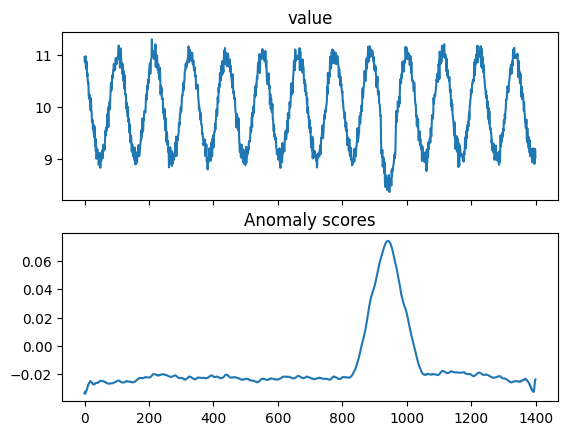

In [5]:
from dtaianomaly.visualization import plot_anomaly_scores

# Load the trend data as a pandas DataFrame
trend_data_df = data_manager.load(dataset_index, train=False)
plot_anomaly_scores(trend_data_df, raw_anomaly_scores);

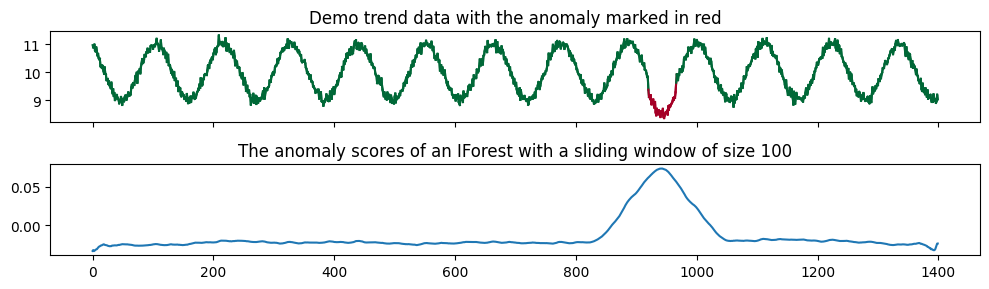

In [6]:
# Regenerate figure to format it for the README
import matplotlib.pyplot as plt
fig = plot_anomaly_scores(trend_data_df, raw_anomaly_scores, show_ground_truth='overlay')
fig.set_size_inches(10, 3)
axs = fig.get_axes()
axs[0].set_title('Demo trend data with the anomaly marked in red')
axs[1].set_title('The anomaly scores of an IForest with a sliding window of size 100')
plt.tight_layout()
plt.savefig('README_demo.svg', transparent=True)